In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
import warnings
warnings.simplefilter("ignore")

os.chdir(r'D:\data485')
events = pd.read_csv("Galapagos Tortoise Movement Ecology Programme_2009-2018.csv",sep=',')

<Axes: >

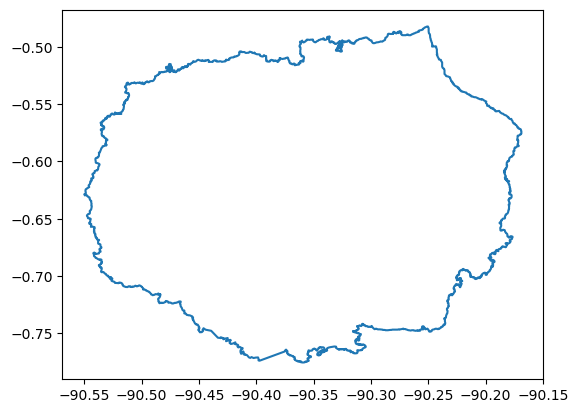

In [2]:
import osmnx as ox
place_name = "Isla Santa Cruz, Galapagos, Ecuador"
santa_cruz_gdf = ox.geocode_to_gdf(place_name)
santa_cruz_gdf.boundary.plot()

This is the map of the tortoise movement. In this project, we will be doing research on the movement of three tortoises: Alison, Christian, and Sparkey.

First of all, we are interested in each tortoise's trajectory:

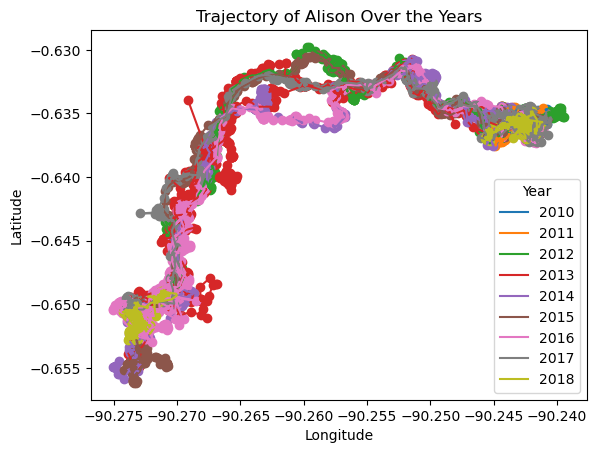

In [3]:
# Convert timestamp to datetime and extract the year
events['timestamp'] = pd.to_datetime(events['timestamp'])
events['year'] = events['timestamp'].dt.year

# Filter for a specific tortoise
tortoise_name = "Alison"  # Replace with the desired name
tortoise_data = events[events['individual-local-identifier'] == tortoise_name]

# Plot each year's trajectory separately
years = tortoise_data['year'].unique()

for year in years:
    yearly_data = tortoise_data[tortoise_data['year'] == year]
    plt.plot(yearly_data['location-long'], yearly_data['location-lat'], label=str(year))
    plt.scatter(yearly_data['location-long'], yearly_data['location-lat'], marker='o')  # Plot points

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Trajectory of {tortoise_name} Over the Years")
plt.legend(title="Year")
plt.show()


Now, we want to also see the trajectories of other tortoises.

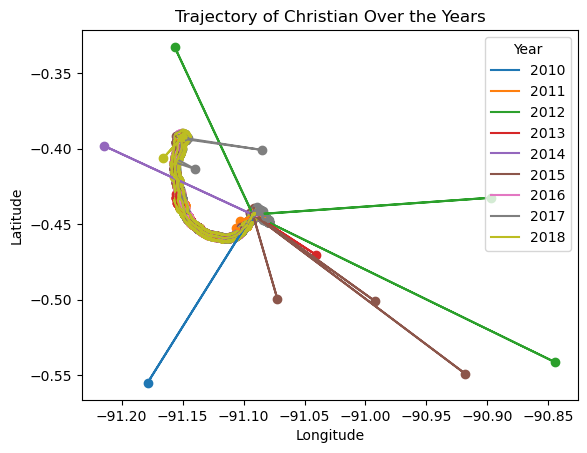

In [4]:
# Filter for a specific tortoise
tortoise_name = "Christian"  # Replace with the desired name
tortoise_data = events[events['individual-local-identifier'] == tortoise_name]

# Plot each year's trajectory separately
years = tortoise_data['year'].unique()

for year in years:
    yearly_data = tortoise_data[tortoise_data['year'] == year]
    plt.plot(yearly_data['location-long'], yearly_data['location-lat'], label=str(year))
    plt.scatter(yearly_data['location-long'], yearly_data['location-lat'], marker='o')  # Plot points

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Trajectory of {tortoise_name} Over the Years")
plt.legend(title="Year")
plt.show()

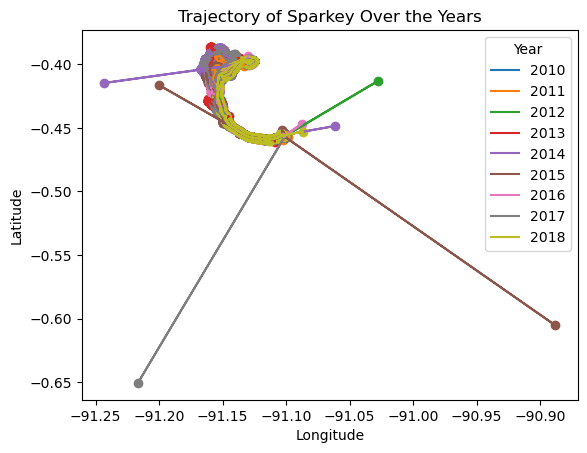

In [5]:
# Filter for a specific tortoise
tortoise_name = "Sparkey"  # Replace with the desired name
tortoise_data = events[events['individual-local-identifier'] == tortoise_name]

# Plot each year's trajectory separately
years = tortoise_data['year'].unique()

for year in years:
    yearly_data = tortoise_data[tortoise_data['year'] == year]
    plt.plot(yearly_data['location-long'], yearly_data['location-lat'], label=str(year))
    plt.scatter(yearly_data['location-long'], yearly_data['location-lat'], marker='o')  # Plot points

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Trajectory of {tortoise_name} Over the Years")
plt.legend(title="Year")
plt.show()

The movement trajectories of these three turtles show that Alison has the greatest range of movement, Christian moves mainly in the west, and Sparkey is mainly active in the north. But that doesn't represent how much distance they move each year, so let's now look at how much distance they each move each year.

We start from Alison:

In [6]:
# Filter for a specific tortoise
tortoise_name = "Alison"  # Replace with the desired name
tortoise_data = events[events['individual-local-identifier'] == tortoise_name]

In [7]:
# drop the nan values for coordinates
tortoise_data = tortoise_data.dropna(subset=['location-lat', 'location-long'])

In [8]:
import geopy
from geopy.distance import geodesic

def calculate_distances(df):
    df = df.sort_values(by='timestamp')
    distances = []
    for i in range(1, len(df)):
        coord1 = (df.iloc[i-1]['location-lat'], df.iloc[i-1]['location-long'])
        coord2 = (df.iloc[i]['location-lat'], df.iloc[i]['location-long'])
        distances.append(geodesic(coord1, coord2).meters)
    return sum(distances) / 1000  # Convert to kilometers

sum_distance = 0
for year in years:
    yearly_data = tortoise_data[tortoise_data['year'] == year]
    distance = calculate_distances(yearly_data)
    sum_distance += distance
    print(f"Total migration distance in {year}: {distance} km")

mean = sum_distance / len(years)
print(f"The average distance of {tortoise_name} is: {mean} km")

Total migration distance in 2010: 22.69964453281334 km
Total migration distance in 2011: 83.67715654233335 km
Total migration distance in 2012: 88.15988067919469 km
Total migration distance in 2013: 93.06174881225625 km
Total migration distance in 2014: 92.2985244973161 km
Total migration distance in 2015: 88.36793434337838 km
Total migration distance in 2016: 92.09120585469802 km
Total migration distance in 2017: 85.72448347177372 km
Total migration distance in 2018: 42.54179447907815 km
The average distance of Alison is: 76.51359702364911 km


In [9]:
# Filter for a specific tortoise
tortoise_name = "Christian"  # Replace with the desired name
tortoise_data = events[events['individual-local-identifier'] == tortoise_name]
# drop the nan values for coordinates
tortoise_data = tortoise_data.dropna(subset=['location-lat', 'location-long'])
import geopy
from geopy.distance import geodesic

def calculate_distances(df):
    df = df.sort_values(by='timestamp')
    distances = []
    for i in range(1, len(df)):
        coord1 = (df.iloc[i-1]['location-lat'], df.iloc[i-1]['location-long'])
        coord2 = (df.iloc[i]['location-lat'], df.iloc[i]['location-long'])
        distances.append(geodesic(coord1, coord2).meters)
    return sum(distances) / 1000  # Convert to kilometers

sum_distance = 0
for year in years:
    yearly_data = tortoise_data[tortoise_data['year'] == year]
    distance = calculate_distances(yearly_data)
    sum_distance += distance
    print(f"Total migration distance in {year}: {distance} km")

mean = sum_distance / len(years)
print(f"The average distance of {tortoise_name} is: {mean} km")

Total migration distance in 2010: 48.019461023609864 km
Total migration distance in 2011: 118.07941616508019 km
Total migration distance in 2012: 253.05213447325912 km
Total migration distance in 2013: 129.41207683703703 km
Total migration distance in 2014: 135.41699561032843 km
Total migration distance in 2015: 205.4444829172641 km
Total migration distance in 2016: 104.17515584977562 km
Total migration distance in 2017: 137.28226815046568 km
Total migration distance in 2018: 86.0384988235258 km
The average distance of Christian is: 135.2133877611495 km


In [10]:
# Filter for a specific tortoise
tortoise_name = "Sparkey"  # Replace with the desired name
tortoise_data = events[events['individual-local-identifier'] == tortoise_name]
# drop the nan values for coordinates
tortoise_data = tortoise_data.dropna(subset=['location-lat', 'location-long'])
import geopy
from geopy.distance import geodesic

def calculate_distances(df):
    df = df.sort_values(by='timestamp')
    distances = []
    for i in range(1, len(df)):
        coord1 = (df.iloc[i-1]['location-lat'], df.iloc[i-1]['location-long'])
        coord2 = (df.iloc[i]['location-lat'], df.iloc[i]['location-long'])
        distances.append(geodesic(coord1, coord2).meters)
    return sum(distances) / 1000  # Convert to kilometers

sum_distance = 0
for year in years:
    yearly_data = tortoise_data[tortoise_data['year'] == year]
    distance = calculate_distances(yearly_data)
    sum_distance += distance
    print(f"Total migration distance in {year}: {distance} km")

mean = sum_distance / len(years)
print(f"The average distance of {tortoise_name} is: {mean} km")

Total migration distance in 2010: 14.515854782575758 km
Total migration distance in 2011: 104.65240956462497 km
Total migration distance in 2012: 115.50358021382367 km
Total migration distance in 2013: 99.4295593454683 km
Total migration distance in 2014: 132.49045175163107 km
Total migration distance in 2015: 185.8631616308597 km
Total migration distance in 2016: 89.81776404119772 km
Total migration distance in 2017: 165.9423242226746 km
Total migration distance in 2018: 72.64464653104186 km
The average distance of Sparkey is: 108.98441689821087 km


So while Alison's range of movement is the greatest, it actually moves the smallest distance per year instead. Christian and Sparkey, on the other hand, moved a very long distance each year in a smaller range of movement.

In addition to the trajectory and distance, the speed is another key factor.

In [11]:
events = events.dropna(subset=['location-lat', 'location-long'])
# Calculate distance and time differences between successive points
distances = []
times = []
speeds = []

for i in range(1, len(events)):
    # Get coordinates of two consecutive points
    coord1 = (events.iloc[i-1]['location-lat'], events.iloc[i-1]['location-long'])
    coord2 = (events.iloc[i]['location-lat'], events.iloc[i]['location-long'])

    # Calculate distance in kilometers
    distance = geodesic(coord1, coord2).kilometers
    distances.append(distance)
    
    # Calculate time difference in hours
    time_diff = (events.iloc[i]['timestamp'] - events.iloc[i-1]['timestamp']).total_seconds() / 3600  # in hours
    times.append(time_diff)
    
    # Calculate speed in km/h
    if time_diff > 0:
        speed = distance / time_diff
    else:
        speed = 0
    speeds.append(speed)

# Add calculated speeds to the DataFrame (optional)
events = events.iloc[1:]  # Remove the first row (since speed calculation starts from the second row)
events['distance_km'] = distances
events['time_hours'] = times
events['speed_kmh'] = speeds

print(events[['timestamp', 'location-lat', 'location-long', 'distance_km', 'time_hours', 'speed_kmh']])


                      timestamp  location-lat  location-long  distance_km  \
2       2010-09-23 18:00:32.000     -0.456140     -91.103888     0.000035   
3       2010-09-23 19:00:29.000     -0.456151     -91.103904     0.002173   
4       2010-09-23 20:00:55.999     -0.456153     -91.103904     0.000309   
5       2010-09-23 21:00:15.001     -0.456149     -91.103918     0.001629   
6       2010-09-23 22:00:43.999     -0.456123     -91.103925     0.003011   
...                         ...           ...            ...          ...   
1841233 2018-10-02 19:00:24.000     -0.720037     -90.464489     0.006967   
1841234 2018-10-02 20:00:38.000     -0.719916     -90.464461     0.013749   
1841235 2018-10-02 21:00:33.000     -0.720105     -90.464638     0.028690   
1841236 2018-10-02 22:00:27.000     -0.720034     -90.464697     0.010163   
1841252 2018-10-03 14:00:53.000     -0.720056     -90.464395     0.033599   

         time_hours  speed_kmh  
2          0.995001   0.000035  
3        

In [12]:
tortoise_name = "Alison"  # Replace with the desired name
tortoise_data = events[events['individual-local-identifier'] == tortoise_name]

# Plot each year's trajectory separately
years = tortoise_data['year'].unique()

for year in years:
    yearly_data = tortoise_data[tortoise_data['year'] == year]
    average_speed = yearly_data['speed_kmh'].mean()
    distance = calculate_distances(yearly_data)
    print(f"{tortoise_name} average speed in {year}: {average_speed} km")

Alison average speed in 2010: 0.013751271764120875 km
Alison average speed in 2011: 0.014813986512063327 km
Alison average speed in 2012: 0.015684895732922692 km
Alison average speed in 2013: 0.017214656417116676 km
Alison average speed in 2014: 0.01700811368209187 km
Alison average speed in 2015: 0.015828349829053436 km
Alison average speed in 2016: 0.016345166723349888 km
Alison average speed in 2017: 0.014975523608481648 km
Alison average speed in 2018: 0.014726555803964415 km


Alison is moving at about the same rate every year, relatively consistently. However, when combined with the previous data on the distance it moved each year, it actually migrated a particularly short distance in 2010 and 2018, perhaps because there are a lot of NAN values in the data for those two years.

Now, we can take a look on other tortoises: Chrsitian and Sparkey.

In [13]:
tortoise_name = "Christian"  # Replace with the desired name
tortoise_data = events[events['individual-local-identifier'] == tortoise_name]

# Plot each year's trajectory separately
years = tortoise_data['year'].unique()

for year in years:
    yearly_data = tortoise_data[tortoise_data['year'] == year]
    average_speed = yearly_data['speed_kmh'].mean()
    distance = calculate_distances(yearly_data)
    print(f"{tortoise_name} average speed in {year}: {average_speed} km")

Christian average speed in 2010: 0.022691264081082685 km
Christian average speed in 2011: 0.021242536796716373 km
Christian average speed in 2012: 0.04570461296776241 km
Christian average speed in 2013: 0.023265034349620777 km
Christian average speed in 2014: 0.024214423262265736 km
Christian average speed in 2015: 0.033387291036505264 km
Christian average speed in 2016: 0.01860408441999526 km
Christian average speed in 2017: 0.024613054875400126 km
Christian average speed in 2018: 0.02871108855030022 km


In [14]:
tortoise_name = "Sparkey"  # Replace with the desired name
tortoise_data = events[events['individual-local-identifier'] == tortoise_name]

# Plot each year's trajectory separately
years = tortoise_data['year'].unique()

for year in years:
    yearly_data = tortoise_data[tortoise_data['year'] == year]
    average_speed = yearly_data['speed_kmh'].mean()
    distance = calculate_distances(yearly_data)
    print(f"{tortoise_name} average speed in {year}: {average_speed} km")

Sparkey average speed in 2010: 0.009399231391164255 km
Sparkey average speed in 2011: 0.01876213539210916 km
Sparkey average speed in 2012: 0.02065424934832371 km
Sparkey average speed in 2013: 0.017862696301181702 km
Sparkey average speed in 2014: 0.023648431648543737 km
Sparkey average speed in 2015: 0.0336322282582663 km
Sparkey average speed in 2016: 0.015870521415005025 km
Sparkey average speed in 2017: 0.029935873678299967 km
Sparkey average speed in 2018: 0.023787706008248755 km


The results of speed reflect the results of the trajectory and the distance, Alison moves slowest among these three and Christian is the fastest.

In general, Alison is stable in the speed and has the largest range of movement, and he moved exceptionally less in 2010 and 2018. Christian and Sparkey's average speeds are not as consistent but faster. Christian is the fastest and is relatively more stable in the moving distance every year. Sparkey moved exceptionally slow and had a low moving distance in 2010.